In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report, accuracy_score

%matplotlib inline

In [2]:
scores=pd.read_csv("C:\\Users\\Mason\\Desktop\\port.csv", sep=';' )
scores.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
target=scores.G3

In [4]:
data=scores

In [5]:
data['school']=pd.get_dummies(data.school)
data['sex']=pd.get_dummies(data.sex)
data['address']=pd.get_dummies(data.address)
data['famsize']=pd.get_dummies(data.famsize)
data['Pstatus']=pd.get_dummies(data.Pstatus)
data['schoolsup']=pd.get_dummies(data.schoolsup)
data['famsup']=pd.get_dummies(data.famsup)
data['paid']=pd.get_dummies(data.paid)
data['activities']=pd.get_dummies(data.activities)
data['nursery']=pd.get_dummies(data.nursery)
data['higher']=pd.get_dummies(data.higher)
data['internet']=pd.get_dummies(data.internet)
data['romantic']=pd.get_dummies(data.romantic)

In [6]:
data['parentedu']=data.Medu+data.Fedu


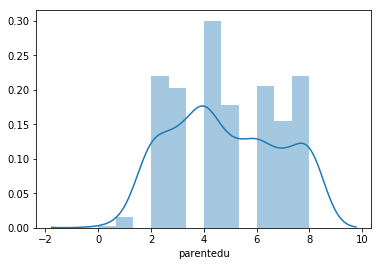

In [7]:
sns.distplot(data.parentedu)

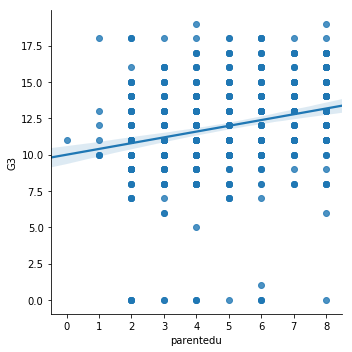

In [8]:
sns.lmplot(x="parentedu", y='G3', data=scores)

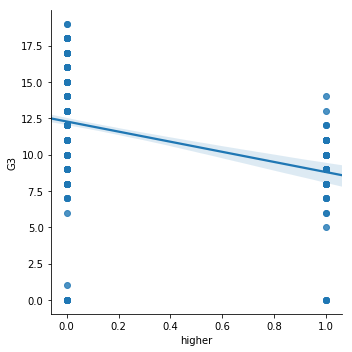

In [9]:
sns.lmplot(x="higher", y='G3', data=scores)

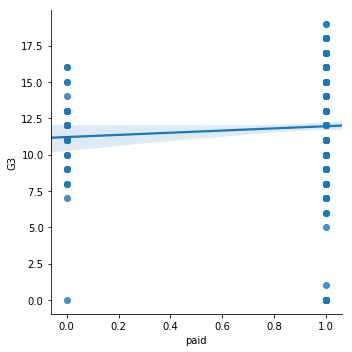

In [10]:
sns.lmplot(x="paid", y='G3', data=scores)

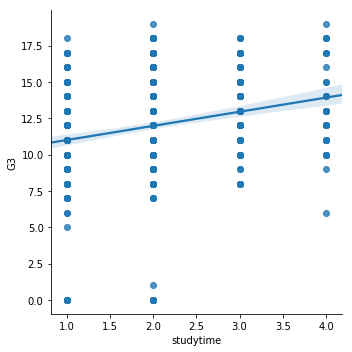

In [11]:
sns.lmplot(x="studytime", y='G3', data=scores)

In [12]:
data["social"]=data.goout+data.Dalc+data.Walc+data.freetime

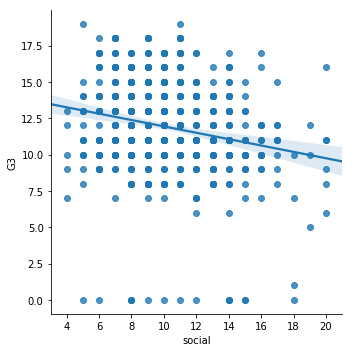

In [13]:
sns.lmplot(x="social", y='G3', data=data)

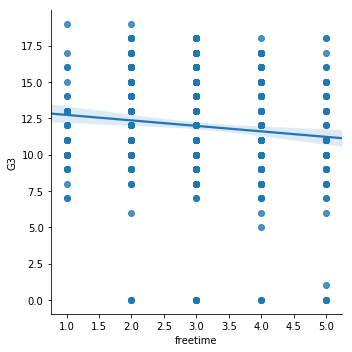

In [14]:
sns.lmplot(x="freetime", y='G3', data=scores)

In [15]:
for_corr=data
data=scores.drop(['G1','G2', 'G3'], axis=1)
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
parentedu     0
social        0
dtype: int64

In [16]:
numbers=data.select_dtypes(include=[np.number])

In [17]:
scale=StandardScaler()
scale.fit(numbers)
scale_df=scale.transform(numbers)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(numbers,target, random_state=42, test_size=.33)

In [19]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions=model.predict(X_test)
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 7.6119711748


Text(0.5,1,'Target Distribution')

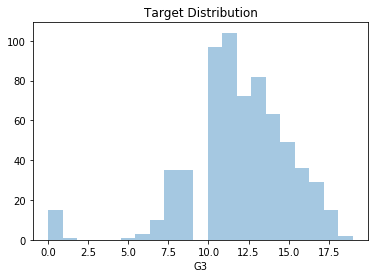

In [20]:
sns.distplot(target, kde=False)
plt.title('Target Distribution')


In [21]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor()
random_search=RandomizedSearchCV(model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.001, 'eta0': 0.003}


In [45]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 3.0032287993093303
Test RMSE: 2.877387387986141


In [23]:
from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(scale_df, target)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)

In [24]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = []
for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)

In [53]:
sorted(list(zip(numbers.columns, linear_regression_model.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('age', 0.54839732826340237),
 ('failures', -0.39947985845984585),
 ('studytime', 0.31044590563940022),
 ('parentedu', 0.28340781560540762),
 ('famrel', 0.2626688635728191),
 ('school', 0.26031347704051278),
 ('Dalc', -0.1953132525541583),
 ('higher', -0.16206484721786948),
 ('Medu', 0.14869232270960778),
 ('Fedu', 0.1347154928958009),
 ('social', -0.1320224969758482),
 ('romantic', 0.12338170941477904),
 ('paid', 0.1152056145985613),
 ('schoolsup', 0.10555455917904134),
 ('sex', 0.098253155560955027),
 ('freetime', 0.073284804606727996),
 ('Walc', -0.060334669434716111),
 ('address', -0.058880466586961715),
 ('health', -0.0550874420864437),
 ('goout', 0.050340620406298962),
 ('traveltime', 0.047466091437834486),
 ('internet', -0.041543424857109372),
 ('absences', -0.022659732586067238),
 ('nursery', 0.021082799551133367),
 ('Pstatus', 0.016006317841149351),
 ('activities', 0.0060024958217789973),
 ('famsup', -0.0037681214386246372),
 ('famsize', -0.00068844200002123631)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text xticklabel objects>)

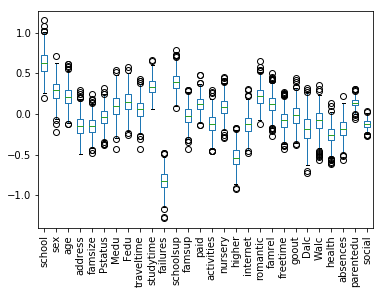

In [54]:
data_df=pd.DataFrame(data)
coef_df = pd.DataFrame(coeffs, columns=numbers.columns)
coef_df.plot(kind='box')
plt.xticks(rotation=90)

In [26]:

corr=for_corr.corr()
corr.sort_values(["G3"], ascending=False, inplace=True)
print(corr.G3)

G3            1.000000
G2            0.918548
G1            0.826387
school        0.284294
studytime     0.249789
parentedu     0.249217
Medu          0.240151
Fedu          0.211800
sex           0.129077
romantic      0.090583
schoolsup     0.066405
famrel        0.063361
paid          0.054898
Pstatus       0.000754
nursery      -0.028752
famsize      -0.045016
famsup       -0.059206
activities   -0.059791
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
internet     -0.150025
address      -0.167637
Walc         -0.176619
Dalc         -0.204719
social       -0.209660
higher       -0.332172
failures     -0.393316
Name: G3, dtype: float64


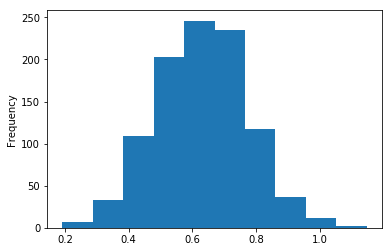

In [27]:
coef_df[0].plot(kind='hist')

In [28]:
target.shape

(649,)

In [29]:
from sklearn.linear_model import ElasticNetCV



clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
model=clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.6623696772158616
Test RMSE: 2.772520311356266


In [30]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

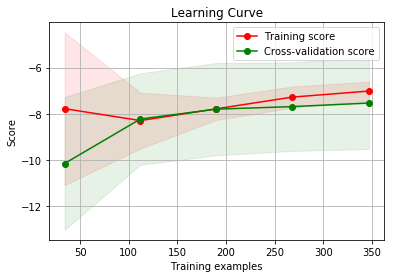

In [31]:
plot_learning_curve(model, "Learning Curve", X_train, y_train, cv=5)

In [32]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

In [33]:
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
grid=gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Train MSE: 7.509273717484861	Test MSE: 8.706438593119353


<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

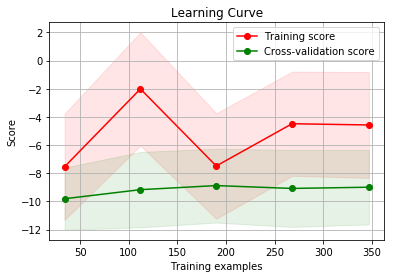

In [34]:
plot_learning_curve(grid, "Learning Curve", X_train, y_train, cv=5)

In [35]:
from sklearn import svm


In [36]:

clf = svm.SVR(C=1)
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.532490699343239
Test RMSE: 2.9057105749039054
